### Importación de datos



In [11]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()



,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [13]:
# Ver cuántas filas (ventas) y columnas tiene la tienda 1
print(f"Filas (ventas): {tienda.shape[0]}")
print(f"Columnas (información): {tienda.shape[1]}")

Filas (ventas): 2359
Columnas (información): 12


In [14]:
# Ver información detallada de cada columna
tienda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


In [15]:
tienda.describe()

,Precio,Costo de envío,Calificación,Cantidad de cuotas,lat,lon
count,2.359000e+03,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000
mean,4.878679e+05,26018.609580,3.976685,2.943196,5.365283,-74.789417
std,6.146868e+05,32860.001783,1.415370,2.819897,2.287445,1.217827
min,7.600000e+03,0.000000,1.000000,1.000000,-4.215280,-77.281110
25%,5.575000e+04,3100.000000,3.000000,1.000000,4.609710,-75.563590
50%,2.353000e+05,12400.000000,5.000000,1.000000,4.609710,-74.199040
75%,6.781000e+05,36000.000000,5.000000,4.000000,6.251840,-74.081750
max,2.977000e+06,160800.000000,5.000000,24.000000,11.544440,-67.923900


In [16]:
# Comparación de las 4 tiendas


tiendas = [tienda, tienda2, tienda3, tienda4]
nombres = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

for i, (nombre, df) in enumerate(zip(nombres, tiendas), 1):
    print(f"\n {nombre}:")
    print(f"   Cantidad de ventas: {df. shape[0]}")
    print(f"   Precio promedio:  ${df['Precio'].mean():,.0f}")
    print(f"   Calificación promedio:  {df['Calificación']. mean():.2f} ")
    print(f"   Costo envío promedio: ${df['Costo de envío'].mean():,.0f}")
    print("-"*70)



 Tienda 1:
   Cantidad de ventas: 2359
   Precio promedio:  $487,868
   Calificación promedio:  3.98 
   Costo envío promedio: $26,019
----------------------------------------------------------------------

 Tienda 2:
   Cantidad de ventas: 2359
   Precio promedio:  $473,227
   Calificación promedio:  4.04 
   Costo envío promedio: $25,216
----------------------------------------------------------------------

 Tienda 3:
   Cantidad de ventas: 2359
   Precio promedio:  $465,460
   Calificación promedio:  4.05 
   Costo envío promedio: $24,806
----------------------------------------------------------------------

 Tienda 4:
   Cantidad de ventas: 2358
   Precio promedio:  $440,363
   Calificación promedio:  4.00 
   Costo envío promedio: $23,459
----------------------------------------------------------------------


In [20]:
# Ingresos totales

for nombre, df in zip(nombres, tiendas):
    # Ingresos totales (suma de todos los precios)
    ingresos_totales = df['Precio']. sum()

    # Costos de envío totales
    envios_totales = df['Costo de envío'].sum()

    # Ingresos netos (ingresos - costos de envío)
    ingresos_netos = ingresos_totales - envios_totales

    print(f"\n {nombre}:")
    print(f"   Ingresos totales:       ${ingresos_totales: ,.0f}")
    print(f"   Costos de envío:        ${envios_totales:,.0f}")
    print(f"   Ingresos netos:        ${ingresos_netos:,.0f}")
    print(f"   Cantidad de ventas:    {df. shape[0]}")
    print("-"*70)



 Tienda 1:
   Ingresos totales:       $ 1,150,880,400
   Costos de envío:        $61,377,900
   Ingresos netos:        $1,089,502,500
   Cantidad de ventas:    2359
----------------------------------------------------------------------

 Tienda 2:
   Ingresos totales:       $ 1,116,343,500
   Costos de envío:        $59,485,100
   Ingresos netos:        $1,056,858,400
   Cantidad de ventas:    2359
----------------------------------------------------------------------

 Tienda 3:
   Ingresos totales:       $ 1,098,019,600
   Costos de envío:        $58,516,600
   Ingresos netos:        $1,039,503,000
   Cantidad de ventas:    2359
----------------------------------------------------------------------

 Tienda 4:
   Ingresos totales:       $ 1,038,375,700
   Costos de envío:        $55,317,400
   Ingresos netos:        $983,058,300
   Cantidad de ventas:    2358
----------------------------------------------------------------------


In [21]:
# Categorías más vendidas

for nombre, df in zip(nombres, tiendas):
    print(f"\n {nombre}:")
    print(df['Categoría del Producto'].value_counts().head(5))
    print("-"*70)


 Tienda 1:
Categoría del Producto
Muebles                 465
Electrónicos            448
Juguetes                324
Electrodomésticos       312
Deportes y diversión    284
Name: count, dtype: int64
----------------------------------------------------------------------

 Tienda 2:
Categoría del Producto
Muebles                 442
Electrónicos            422
Juguetes                313
Electrodomésticos       305
Deportes y diversión    275
Name: count, dtype: int64
----------------------------------------------------------------------

 Tienda 3:
Categoría del Producto
Muebles                 499
Electrónicos            451
Juguetes                315
Electrodomésticos       278
Deportes y diversión    277
Name: count, dtype: int64
----------------------------------------------------------------------

 Tienda 4:
Categoría del Producto
Muebles                 480
Electrónicos            451
Juguetes                338
Deportes y diversión    277
Electrodomésticos       254
Name: cou

In [22]:
# Calificación de los clientes en cada tienda
for nombre, df in zip(nombres, tiendas):
    print(f"\n {nombre}:")

    # Contar calificaciones
    calif_1_2 = df[df['Calificación'] <= 2].shape[0]  # Malas
    calif_3 = df[df['Calificación'] == 3].shape[0]    # Regulares
    calif_4_5 = df[df['Calificación'] >= 4]. shape[0]  # Buenas

    total = df.shape[0]

    print(f"   (1-2 estrellas): {calif_1_2} ({calif_1_2/total*100:.1f}%)")
    print(f"    (3 estrellas):   {calif_3} ({calif_3/total*100:.1f}%)")
    print(f"    (4-5 estrellas): {calif_4_5} ({calif_4_5/total*100:.1f}%)")
    print("-"*70)



 Tienda 1:
   (1-2 estrellas): 405 (17.2%)
    (3 estrellas):   218 (9.2%)
    (4-5 estrellas): 1736 (73.6%)
----------------------------------------------------------------------

 Tienda 2:
   (1-2 estrellas): 366 (15.5%)
    (3 estrellas):   209 (8.9%)
    (4-5 estrellas): 1784 (75.6%)
----------------------------------------------------------------------

 Tienda 3:
   (1-2 estrellas): 376 (15.9%)
    (3 estrellas):   193 (8.2%)
    (4-5 estrellas): 1790 (75.9%)
----------------------------------------------------------------------

 Tienda 4:
   (1-2 estrellas): 395 (16.8%)
    (3 estrellas):   210 (8.9%)
    (4-5 estrellas): 1753 (74.3%)
----------------------------------------------------------------------


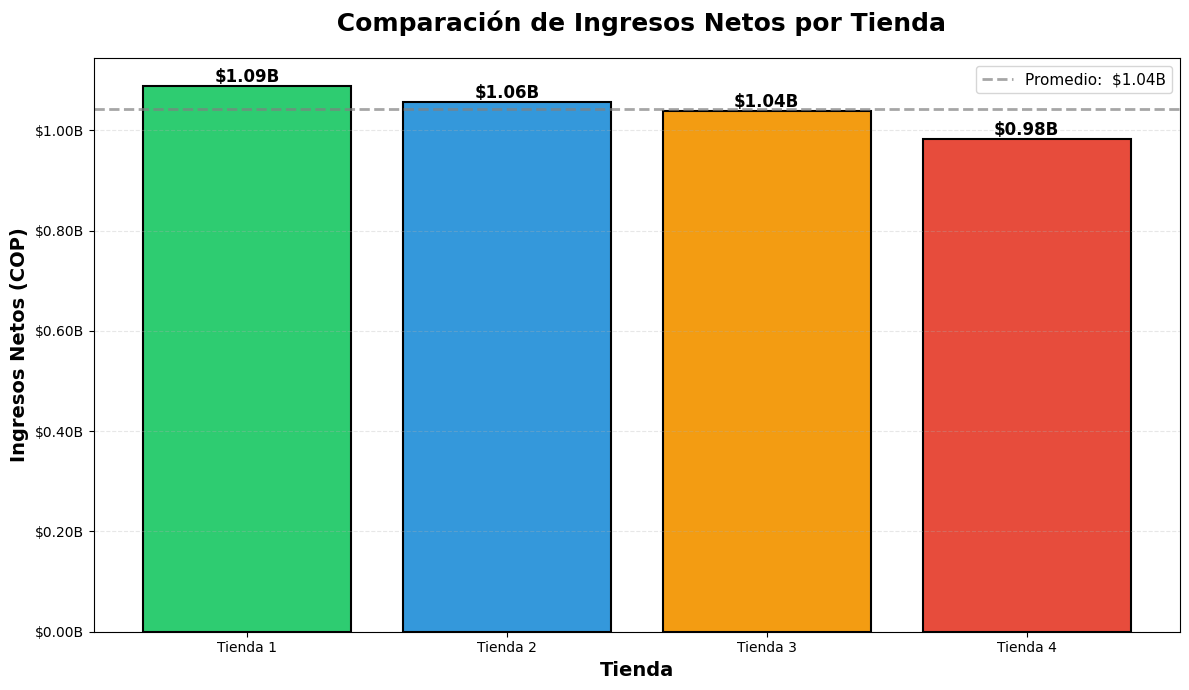

Grafico de ingresos netos


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Grafico de los ingresos netos

nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ingresos_netos = []
for df in tiendas:
    ingreso_total = df['Precio']. sum()
    costo_envio = df['Costo de envío'].sum()
    ingreso_neto = ingreso_total - costo_envio
    ingresos_netos. append(ingreso_neto)

# Se crea el Grafico
plt.figure(figsize=(12, 7))
colores = ['#2ecc71', '#3498db', '#f39c12', '#e74c3c']
barras = plt.bar(nombres_tiendas, ingresos_netos, color=colores, edgecolor='black', linewidth=1.5)

plt.title(' Comparación de Ingresos Netos por Tienda',
          fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Tienda', fontsize=14, fontweight='bold')
plt.ylabel('Ingresos Netos (COP)', fontsize=14, fontweight='bold')

# mm a b
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e9:.2f}B'))

for i, (barra, valor) in enumerate(zip(barras, ingresos_netos)):
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2., altura,
             f'${valor/1e9:.2f}B',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

promedio = np.mean(ingresos_netos)
plt.axhline(y=promedio, color='gray', linestyle='--', linewidth=2, alpha=0.7,
            label=f'Promedio:  ${promedio/1e9:.2f}B')


plt. legend(fontsize=11)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

print("Grafico de ingresos netos")



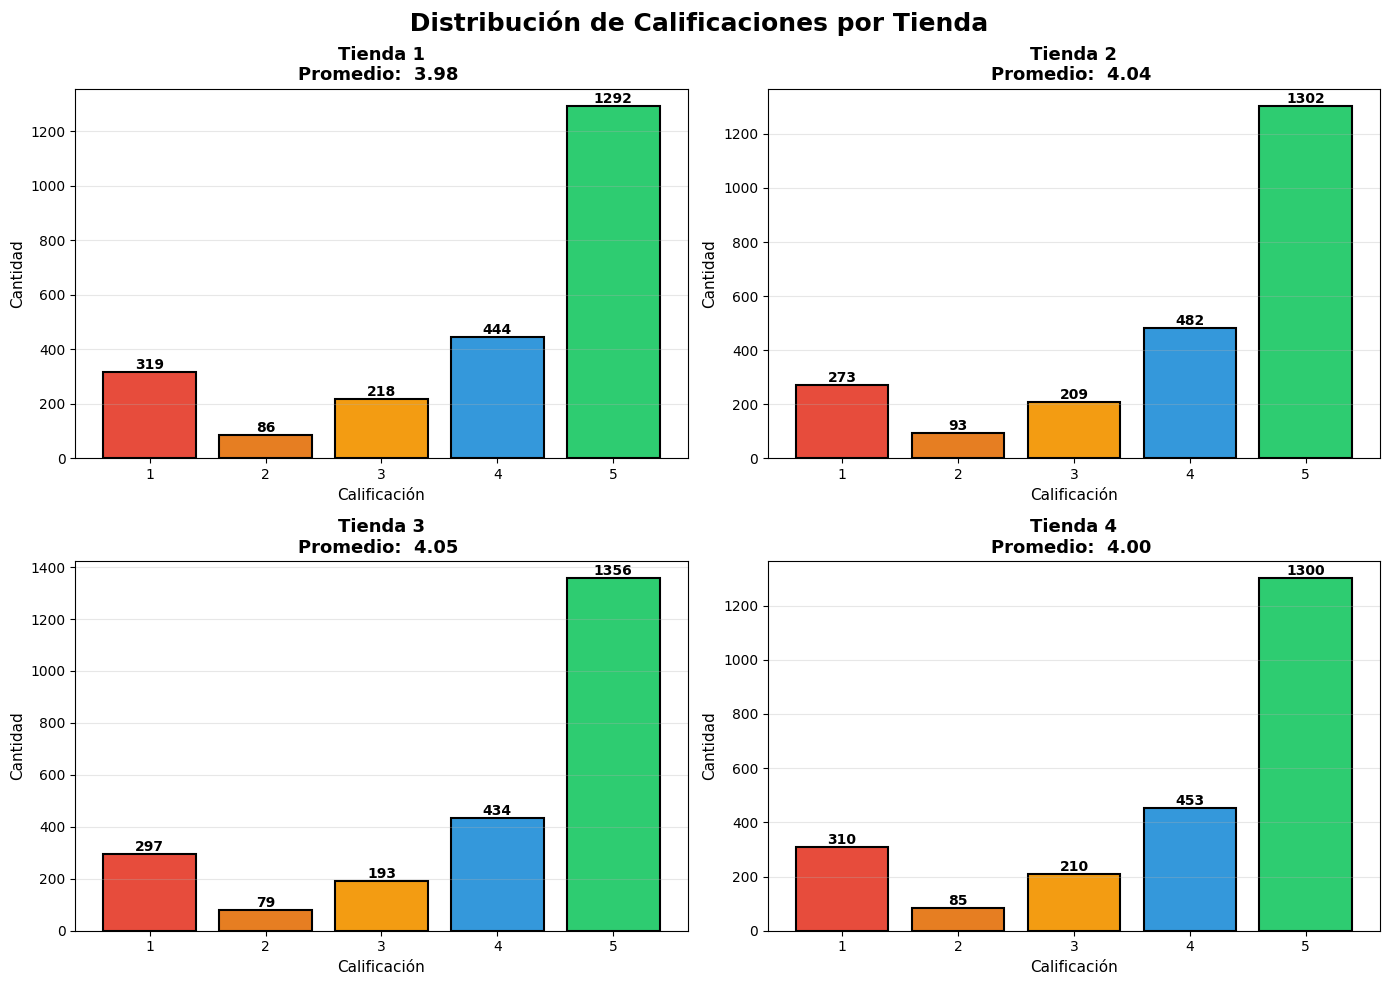

In [34]:
# GRÁFICO 2: DISTRIBUCIÓN DE CALIFICACIONES

# Crear figura con 4 subgráficos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle(' Distribución de Calificaciones por Tienda',
             fontsize=18, fontweight='bold')

axes = axes.flatten()
colores_calif = ['#e74c3c', '#e67e22', '#f39c12', '#3498db', '#2ecc71']

# Crear gráfico para cada tienda
for idx in range(4):
    nombre = nombres_tiendas[idx]
    df = tiendas[idx]
    ax = axes[idx]

    # Contar calificaciones de 1 a 5
    conteo_calif = df['Calificación']. value_counts().sort_index()

    # Crear barras
    barras = ax. bar(conteo_calif.index, conteo_calif.values,
                    color=colores_calif, edgecolor='black', linewidth=1.5)

    # Calcular promedio
    promedio = df['Calificación'].mean()

    ax.set_title(f'{nombre}\nPromedio:  {promedio:.2f} ',
                 fontsize=13, fontweight='bold')

    # Etiquetas
    ax.set_xlabel('Calificación', fontsize=11)
    ax.set_ylabel('Cantidad', fontsize=11)
    ax.set_xticks([1, 2, 3, 4, 5])

    # Agregar valores encima de barras
    for barra in barras:
        altura = barra.get_height()
        ax.text(barra.get_x() + barra.get_width()/2, altura,
                f'{int(altura)}',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

    # Grid
    ax.grid(axis='y', alpha=0.3)

# Ajustar
plt.tight_layout()
plt.show()


/tmp/ipython-input-1728890680.py:50: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1728890680.py:50: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


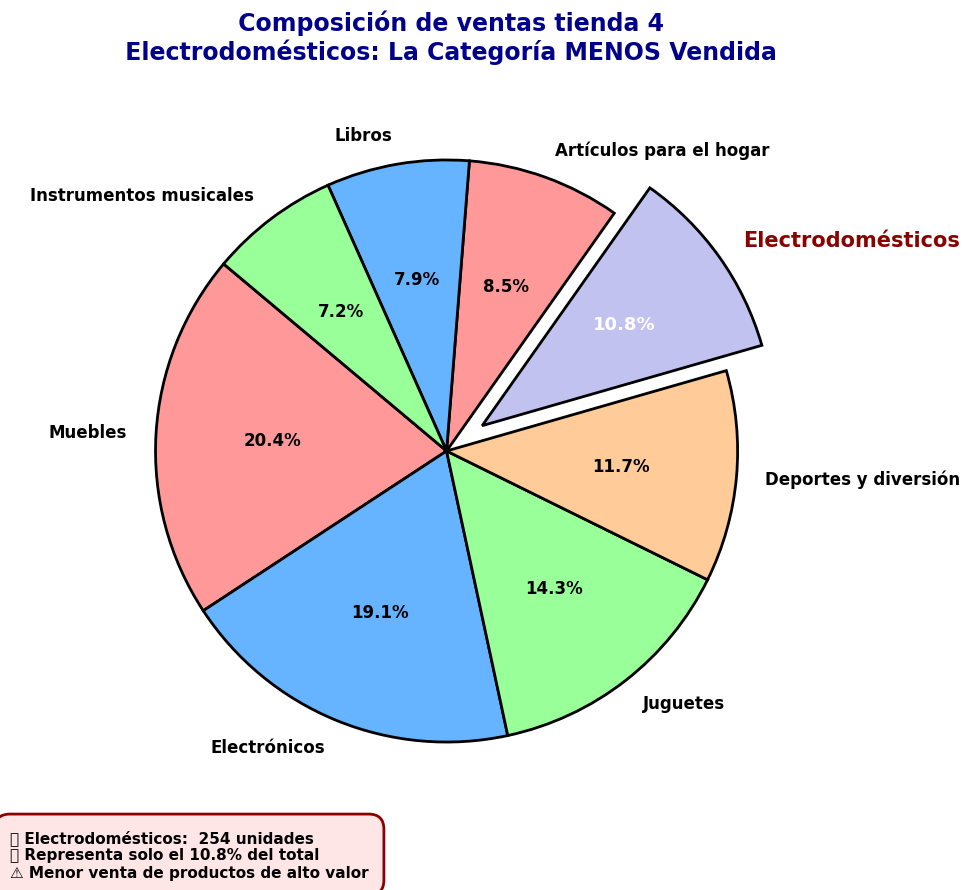

In [42]:
# Tercer grafico, producto menos vendido en la tienda 4 (El que más ganancias representa se vende menos)


# Datos de Tienda 4
ventas_t4 = tienda4['Categoría del Producto'].value_counts()

# Crear figura
fig, ax = plt.subplots(figsize=(12, 9))

colores_pastel = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

explotar = []
for cat in ventas_t4.index:
    if cat == 'Electrodomésticos':
        explotar.append(0.15)  # Separar esta porción
    else:
        explotar. append(0)

# Crear pie chart
wedges, texts, autotexts = ax.pie(ventas_t4.values,
                                    labels=ventas_t4.index,
                                    autopct='%1.1f%%',
                                    startangle=140,
                                    colors=colores_pastel,
                                    explode=explotar,
                                    textprops={'fontsize':  12, 'fontweight':  'bold'},
                                    wedgeprops={'edgecolor': 'black', 'linewidth': 2})

# Destacar visualmente el texto de Electrodomésticos
for i, texto in enumerate(texts):
    if ventas_t4.index[i] == 'Electrodomésticos':
        texto.set_color('darkred')
        texto.set_fontsize(15)
        texto.set_fontweight('bold')
        # Destacar también el porcentaje
        autotexts[i].set_color('white')
        autotexts[i].set_fontweight('bold')
        autotexts[i]. set_fontsize(13)

# Título
ax.set_title(' Composición de ventas tienda 4\n Electrodomésticos: La Categoría MENOS Vendida',
             fontsize=17, fontweight='bold', pad=20, color='darkblue')


ax.text(-1.5, -1.3, textstr, fontsize=11,
        bbox=dict(boxstyle='round,pad=1', facecolor='#ffe6e6', edgecolor='darkred', linewidth=2),
        verticalalignment='top', fontweight='bold')


plt.tight_layout()
plt.show()
